# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruiting_costs`, `salary_grid`.

In [1]:
# vk_token = "709d6bee4295919acf67d050343196f7d56e03c3b5ca9dd13dbfd701e3481d56e5cef785f80b68579e764"


# url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + '&owner_id=-66669811&count=1&v=5.92'
# response = getjson(url)


In [1]:
#Импортируем все нужные библиотеки
import psycopg2
import sqlalchemy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Соединение с базой данной
connection = 'postgresql+psycopg2://'\
+'readonly'\
+':6hajV34RTQfmxhS'\
+'@dsstudents'\
+'.skillbox.ru:5432'\
+'/human_resources'

#Движок базы данной 
engine = sqlalchemy.create_engine(connection)

#Объект подключения к БД
conn = engine.connect()

#Создаём инспектора и проверям отображение таблиц
inspector =  sqlalchemy.inspect(engine)
inspector.get_table_names()


['hr_dataset', 'production_staff', 'recruiting_costs', 'salary_grid']

In [75]:
#Настройка отображения для того чтобы было видно все колонки
pd.set_option('display.max_columns', None)

#Вывод таблиц для понимания содержания
pd.read_sql(
    'SELECT * FROM hr_dataset', 
    conn)


,id,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,Pay Rate,state,zip,dob,sex,maritaldesc,citizendesc,Hispanic/Latino,racedesc,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
0,1,"Brown, Mia",1103024456,1,1,0,1,1,3,30,28.50,MA,1450,1987-11-24,Female,Married,US Citizen,No,Black or African American,2008-10-27,3317,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,2,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,23.00,MA,1460,1984-04-26,Male,Divorced,US Citizen,No,Black or African American,2014-01-06,1420,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,3,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,29.00,MA,2703,1986-09-01,Male,Single,US Citizen,No,White,2014-09-29,1154,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,4,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,21.50,MA,2170,1985-09-16,Female,Married,US Citizen,No,White,2015-02-16,58,2015-04-15,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,5,"Singh, Nan",1307059817,0,0,0,1,1,9,30,16.56,MA,2330,1988-05-19,Female,Single,US Citizen,No,White,2015-05-01,940,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,306,"Navathe, Kurt",1009919960,0,0,1,1,3,3,48,52.25,MA,2056,1970-04-25,Male,Single,US Citizen,No,Asian,2017-02-10,289,None,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
306,307,"Wang, Charlie",1009919970,0,0,1,1,3,3,36,51.00,MA,1887,1981-07-08,Male,Single,US Citizen,No,Asian,2017-02-15,284,None,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
307,308,"Smith, Jason",1009919980,0,0,1,1,3,3,34,46.00,MA,2045,1983-09-04,Male,Single,US Citizen,No,White,2017-02-15,284,None,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets
308,309,"Westinghouse, Matthew",1009919990,1,1,1,1,3,3,30,45.00,MA,2134,1987-10-24,Male,Married,US Citizen,No,White,2017-04-20,220,None,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets


In [330]:
df99 = pd.read_sql(
    'SELECT citizendesc, sex FROM hr_dataset', 
    conn)
df99.groupby('citizendesc').count()

,sex
citizendesc,
Eligible NonCitizen,12
Non-Citizen,4
US Citizen,294


In [39]:
pd.read_sql(
    'SELECT * FROM production_staff',
    conn)

,id,Employee Name,Race Desc,Date of Hire,TermDate,Reason for Term,Employment Status,Department,Position,Pay,Manager Name,Performance Score,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints
0,1,"Albert, Michael",White,2011-08-01,None,N/A - still employed,Active,Production,Production Manager,$54.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
1,2,"Bozzi, Charles",Asian,2013-09-30,2014-08-07,retiring,Voluntarily Terminated,Production,Production Manager,$50.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
2,3,"Butler, Webster L",White,2016-01-28,None,N/A - still employed,Active,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0.0,0.0,0.0,0.0
3,4,"Dunn, Amy",White,2014-09-18,None,N/A - still employed,Active,Production,Production Manager,$51.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
4,5,"Gray, Elijiah",White,2015-06-02,None,N/A - still employed,Active,Production,Production Manager,$54.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN
252,253,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN
253,254,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN
254,255,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN


In [5]:
pd.read_sql(
    'SELECT * from recruiting_costs', 
    conn)

,id,Employment Source,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,1,Billboard,520,520,520,520,0,0,612,612,729,749,910,500,6192
1,2,Careerbuilder,410,410,410,820,820,410,410,820,820,1230,820,410,7790
2,3,Company Intranet - Partner,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Diversity Job Fair,0,5129,0,0,0,0,0,4892,0,0,0,0,10021
4,5,Employee Referral,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,Glassdoor,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,Information Session,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,Internet Search,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,MBTA ads,640,640,640,640,640,640,640,1300,1300,1300,1300,1300,10980
9,10,Monster.com,500,500,500,440,500,500,440,500,440,440,500,500,5760


In [42]:
pd.read_sql(
    'SELECT * FROM salary_grid', 
    conn)

,id,Position,Salary Min,Salary Mid,Salary Max,Hourly Min,Hourly Mid,Hourly Max
0,1,Administrative Assistant,30000,40000,50000,14.42,19.23,24.04
1,2,Sr. Administrative Assistant,35000,45000,55000,16.83,21.63,26.44
2,3,Accountant I,42274,51425,62299,20.32,24.72,29.95
3,4,Accountant II,50490,62158,74658,24.27,29.88,35.89
4,5,Sr. Accountant,63264,76988,92454,30.42,37.01,44.45
5,6,Network Engineer,50845,66850,88279,24.44,32.14,42.44
6,7,Sr. Network Engineer,79428,99458,120451,38.19,47.82,57.91
7,8,Database Administrator,50569,68306,93312,24.31,32.84,44.86
8,9,Sr. DBA,92863,116007,139170,44.65,55.77,66.91
9,10,Production Technician I,30000,40000,50000,14.42,19.23,24.04


### Гипотеза 1. Чаще уходят из компании работники определённого возраста

In [221]:
#Создаём датасет с количеством работников и количеством уволившихся, 
#сгруппированный по годам
df = pd.read_sql('''
    SELECT age, COUNT('age') AS age_count, 
    COUNT("Date of Termination") AS Termination_count 
    FROM hr_dataset 
    GROUP BY age 
    ORDER BY age
    ''', 
conn)

#Вычисляем соотношение уволившихся к общему числу работников
df['ratio'] = df.termination_count / df.age_count 

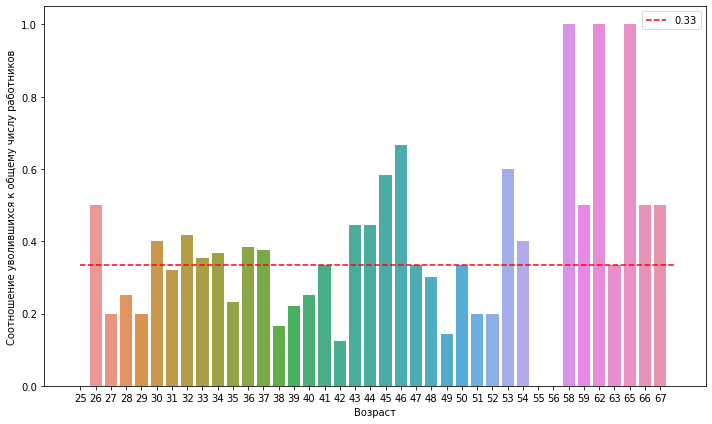

In [222]:
#Настраиваем отображение графика и размечаем его
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df, x='age', y='ratio', ax=ax)

#Проводим линию - общую медиану соотношения по всем возрастам
ax.hlines(df['ratio'].median(), 0, 39, color ="red", linestyles= 'dashed', 
                                      label=round(df['ratio'].median(),2))
ax.legend()

# Выводим подписи осей координат
ax.set_xlabel('Возраст')
ax.set_ylabel('Соотношение уволившихся к общему числу работников')

#Чуток подровняем
plt.tight_layout()

#### Резких выбросов, помимо "предпенсионной" группы не наблюдается
#### Наименьшую текучку показывают группы от 27 до 29 и от 38 до 42 
#### Наибольшую - от 30 до 37 и от 44 до 47

### Гипотеза 2. Лучшие кадры приходят с определенного ресурса


In [175]:
df2 = pd.read_sql('''
                  SELECT "Employee Source", COUNT("Days Employed") AS count, 
                  AVG("Days Employed") AS Average_days
                  FROM hr_dataset hr
                  JOIN recruiting_costs rc ON  
                  hr."Employee Source" = rc."Employment Source"   
                  GROUP BY "Employee Source" 
                  ''', 
                  conn)
df2

,Employee Source,count,average_days
0,Careerbuilder,1,2428.000000
1,Other,9,1910.333333
2,Billboard,16,1680.750000
3,MBTA ads,17,1580.352941
4,Information Session,4,1551.500000
5,Website Banner Ads,13,1471.307692
6,Professional Society,20,1416.600000
7,Monster.com,24,1403.000000
8,Diversity Job Fair,29,1340.448276
9,Search Engine - Google Bing Yahoo,25,1324.560000


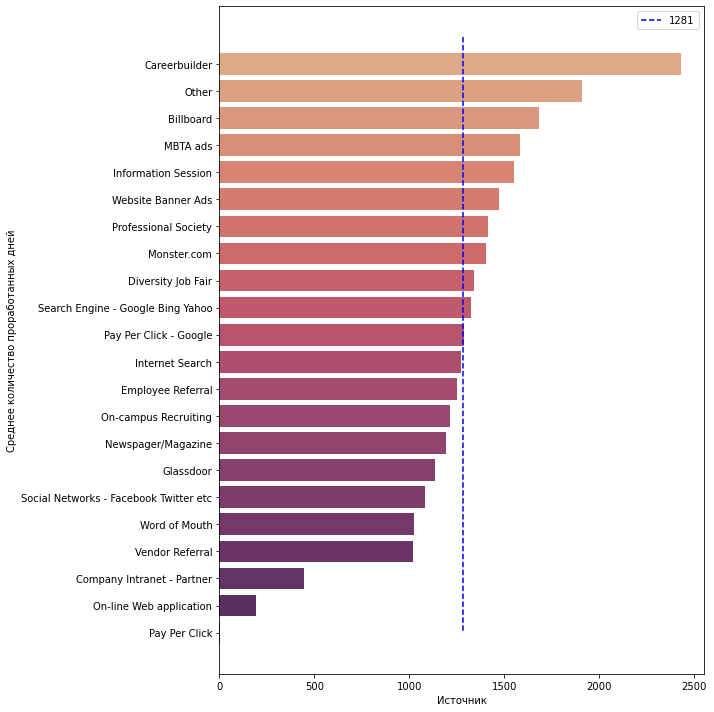

In [277]:
#Настраиваем отображение графика и размечаем его
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df2, x='average_days', y='Employee Source', ax=ax,
                                        palette='flare', orient='h')

#Проводим линию - общую медиану соотношения по всем возрастам
ax.vlines(df2['average_days'].median(), -1, 21, color ="blue", 
          linestyles= 'dashed',label=round(df2['average_days'].median()))
ax.legend()

# Выводим подписи осей координат
ax.set_xlabel('Источник')
ax.set_ylabel('Среднее количество проработанных дней')

#Чуток подровняем
plt.tight_layout()


In [296]:
#Дополнительно создадим списки для более наглядной аналитики в будущем 
good_by_days = list(df2[df2['average_days'] >=\
                        df2['average_days'].median()]['Employee Source'])

bad_by_days = list(df2[df2['average_days'] <=\
                        df2['average_days'].median()]['Employee Source'])

### Гипотеза 3. Некоторые источники найма лучше других

In [247]:
df3 = pd.read_sql('''
    SELECT "Employment Source",  "Total"
    FROM recruiting_costs
    ORDER BY "Total" DESC
    ''', 
conn)


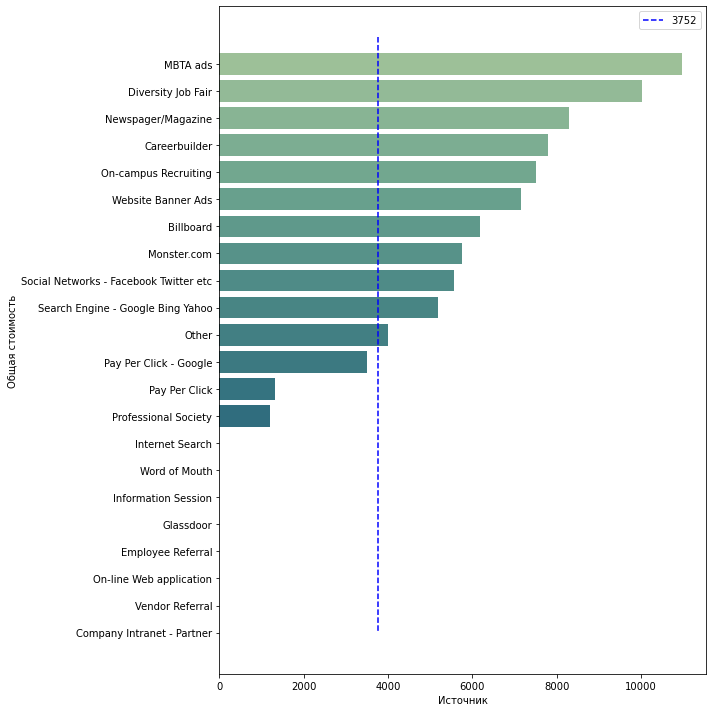

In [278]:
#Настраиваем отображение графика и размечаем его
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df3, x='Total', y='Employment Source',
                    ax=ax, palette='crest', orient='h')

#Проводим линию - общую медиану соотношения по всем возрастам
ax.vlines(df3['Total'].median(), -1, 21, color ="blue", 
          linestyles= 'dashed',label=round(df3['Total'].median()))
ax.legend()

# Выводим подписи осей координат
ax.set_xlabel('Источник')
ax.set_ylabel('Общая стоимость')

#Чуток подровняем
plt.tight_layout()




In [292]:
#Аналогично создаём списки для анализа
expensive_by_total = list(df3[df3['Total'] >=\ 
                              df3['Total'].median()]['Employment Source'])

cheaply_by_total = list(df3[df3['Total'] <=\ 
                              df3['Total'].median()]['Employment Source'])

In [304]:
#В цикле высчитаем два списка
absolutely_good, absolutely_bad = [], []

#Один содержит лучшие источники найма, с которыми, возможно, стоит улучшить взаимодействие
for i in cheaply_by_total:
    if i in good_by_days:
        absolutely_good.append(i)

#Второй худшие, с источниками, взаимодействие с которыми, возможно, стоит пересмотреть       
for i in expensive_by_total:
    if i in bad_by_days:
        absolutely_bad.append(i)   

#Выводим получившиеся списки 
print('Лучшие источники найма - ', absolutely_good, '\n' 'Худшие - ', absolutely_bad)

Лучшие источники найма -  ['Pay Per Click - Google', 'Professional Society', 'Information Session'] 
Худшие -  ['Newspager/Magazine', 'On-campus Recruiting', 'Social Networks - Facebook Twitter etc']


### Гипотеза 4. В Компании женщины получают за ту же работу меньшую зарплату

In [332]:
df4_2 = pd.read_sql('''
    SELECT "position", "sex", AVG("Pay Rate") 
    FROM hr_dataset
    GROUP BY "position", "sex"
    ORDER BY position
    ''', 
conn)
df4_2

,position,sex,avg,count
0,Accountant I,Male,26.000000,2
1,Accountant I,Female,28.500000,1
2,Administrative Assistant,Female,19.520000,3
3,Area Sales Manager,Female,55.083333,12
4,Area Sales Manager,Male,55.333333,15
5,BI Developer,Male,45.333333,3
6,BI Developer,Female,45.000000,1
7,BI Director,Male,63.500000,1
8,CIO,Female,65.000000,1
9,Data Architect,Female,55.000000,1


<AxesSubplot:xlabel='avg', ylabel='position'>

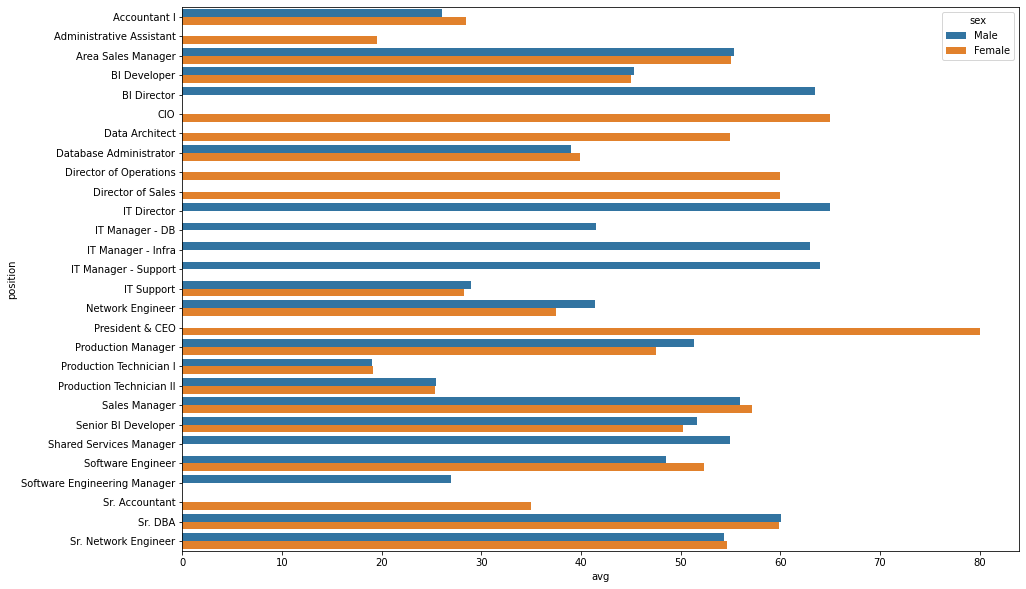

In [339]:
fig, ax = plt.subplots(figsize=(15, 10))


sns.barplot(data=df4_2, x='avg', y='position', hue='sex', orient='h', ax=ax)


### Общие выводы

-Мужчины и женщины получают примерно одинаковую зарплату  
-Наиболее привлекательный возраст нового сотрудника от 27 до 29 и от 38 до 42  
-Пересмотреть бюджетирование следующих источников:   
    'Pay Per Click - Google', 'Professional Society', 'Information Session' - в большую сторону  
    'Newspager/Magazine', 'On-campus Recruiting', 'Social Networks - Facebook Twitter etc' - в меньшую сторону

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://colab.research.google.com/drive/1rRaTay-OSPLAOX8V9UaFvTiAciVtp2s3).

# At work.........

In [ ]:
# vk_token = "709d6bee4295919acf67d050343196f7d56e03c3b5ca9dd13dbfd701e3481d56e5cef785f80b68579e764"


# url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + '&owner_id=-66669811&count=1&v=5.92'
# response = getjson(url)
